<a href="https://colab.research.google.com/github/Prajin0802/EDA/blob/main/21BDS0090_phase%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#males.csv

# data cleaning
import pandas as pd

df = pd.read_csv(r"C:\Users\suman\Dataset Description.csv")

df.drop(columns=["rownames"], inplace=True)

# Fill missing values
df["residence"] = df["residence"].fillna("unknown")

cat_cols = ["union", "ethn", "maried", "health", "industry", "occupation", "residence"]
for col in cat_cols:
    df[col] = df[col].astype("category")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\suman\\Dataset Description.csv'

In [ ]:
# data handling
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("wage", axis=1)
y = df_encoded["wage"]


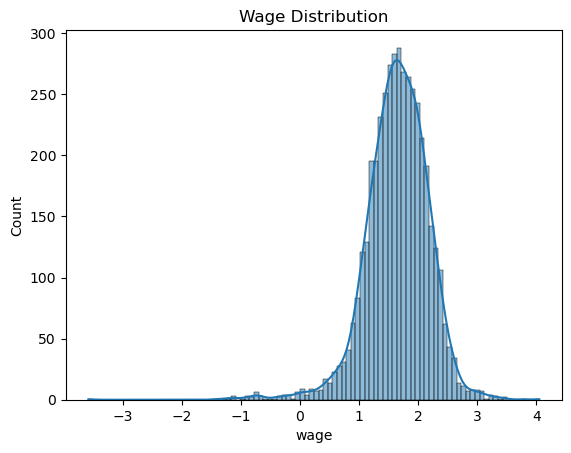

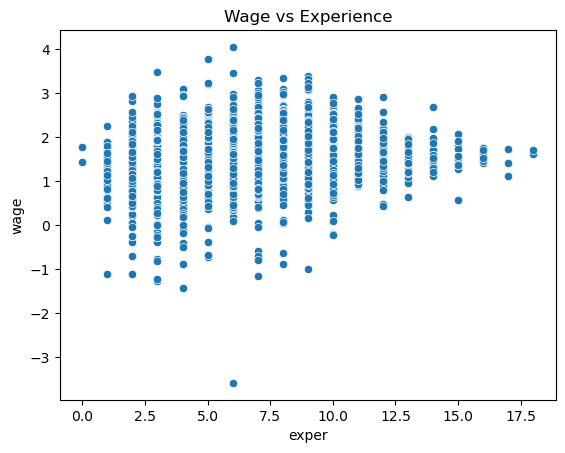

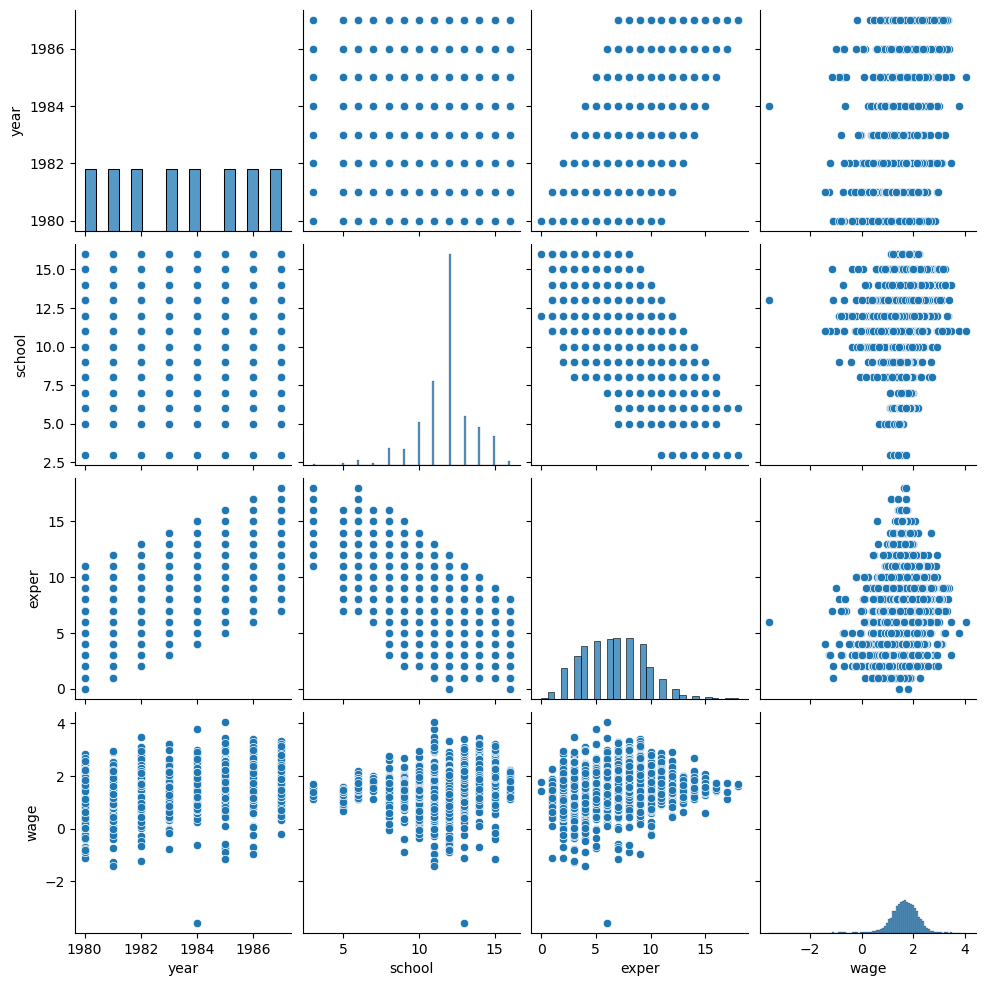

In [ ]:
# 1D, 2D and N-D Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["wage"], kde=True)
plt.title("Wage Distribution")
plt.show()

sns.scatterplot(x="exper", y="wage", data=df)
plt.title("Wage vs Experience")
plt.show()

sns.pairplot(df[["year", "school", "exper", "wage"]])
plt.show()


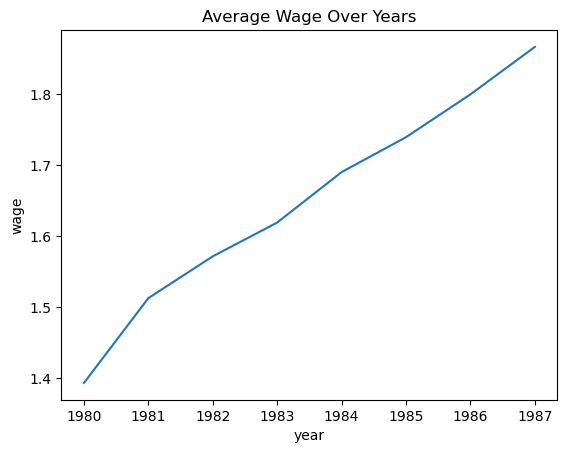

In [ ]:
# Time-series Analyis
avg_wage_by_year = df.groupby("year")["wage"].mean().reset_index()

sns.lineplot(x="year", y="wage", data=avg_wage_by_year)
plt.title("Average Wage Over Years")
plt.show()


count    4360.000000
mean        1.649147
std         0.532609
min        -3.579079
25%         1.350717
50%         1.671143
75%         1.991086
max         4.051860
Name: wage, dtype: float64


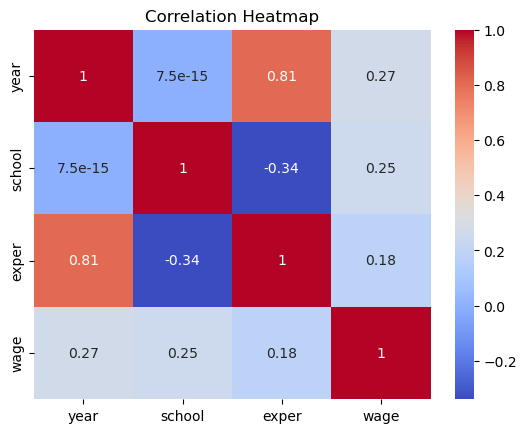

occupation
Professional, Technical_and_kindred    1.848202
Managers, Officials_and_Proprietors    1.794463
Sales_Workers                          1.721384
Craftsmen, Foremen_and_kindred         1.711863
Clerical_and_kindred                   1.620029
Operatives_and_kindred                 1.615995
Laborers_and_farmers                   1.525811
Service_Workers                        1.440432
Farm_Laborers_and_Foreman              1.266210
Name: wage, dtype: float64


C:\Users\suman\AppData\Local\Temp\ipykernel_3860\1466525757.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("occupation")["wage"].mean().sort_values(ascending=False)


In [ ]:
# Analysis of 1D, 2D and N-D data
print(df["wage"].describe())

sns.heatmap(df[["year", "school", "exper", "wage"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

grouped = df.groupby("occupation")["wage"].mean().sort_values(ascending=False)
print(grouped)


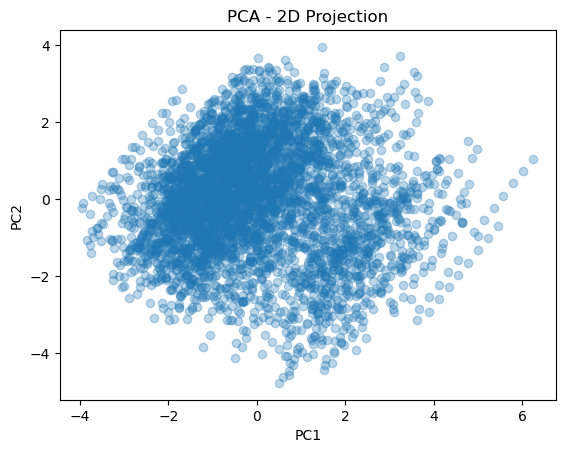

In [ ]:
# Dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.title("PCA - 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [ ]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root MSE (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared (R²):", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 0.32208805976286065
Mean Squared Error (MSE): 0.20744958333482108
Root MSE (RMSE): 0.45546633611587706
R-squared (R²): 0.2593480018482457


C:\Users\suman\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
